In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [6]:
# Veri kümesi yolları
train_folder = "./veri_setleri/tekrardan_bolunmus_hali/train"
val_folder = "./veri_setleri/tekrardan_bolunmus_hali/val"
test_folder = "./veri_setleri/tekrardan_bolunmus_hali/test"

In [7]:
# Sınıflardaki dosya sayısını analiz etme
def count_files_in_classes(folder):
    class_counts = {}
    for class_name in os.listdir(folder):
        class_path = os.path.join(folder, class_name)
        if os.path.isdir(class_path): # Sadece klasörleri sayın
            class_counts[class_name] = len(os.listdir(class_path)) # Dosya sayısını alın
    return class_counts

In [8]:
# Her set için veri sayısını alma
train_counts = count_files_in_classes(train_folder)
val_counts = count_files_in_classes(val_folder)
test_counts = count_files_in_classes(test_folder)

In [9]:
# Veriyi birleştirme ve analiz için dataframe oluşturma
df = pd.DataFrame({
    "Train": train_counts,
    "Validation": val_counts,
    "Test": test_counts
}).fillna(0)

In [10]:
# Sınıf isimlerini indeks olarak ayarlama
df = df.reset_index().rename(columns={"index": "Class"})

In [ ]:
print(df)

                                Class  Train  Validation  Test
0   Alstonia Scholaris diseased (P2a)    177          25    52
1    Alstonia Scholaris healthy (P2b)    124          17    37
2                Arjun diseased (P1a)    162          23    47
3                 Arjun healthy (P1b)    154          22    44
4                 Bael diseased (P4b)     81          11    25
5                  Basil healthy (P8)    102          14    31
6              Chinar diseased (P11b)     84          12    24
7               Chinar healthy (P11a)     72          10    21
8                Gauva diseased (P3b)     98          14    29
9                 Gauva healthy (P3a)    193          27    57
10               Jamun diseased (P5b)    241          34    70
11                Jamun healthy (P5a)    194          27    57
12            Jatropha diseased (P6b)     86          12    26
13             Jatropha healthy (P6a)     93          13    27
14              Lemon diseased (P10b)     53           

In [12]:
# Her veri seti için toplam örnek sayısı
totals = {
    "Train": sum(train_counts.values()),
    "Validation": sum(val_counts.values()),
    "Test": sum(test_counts.values())
}

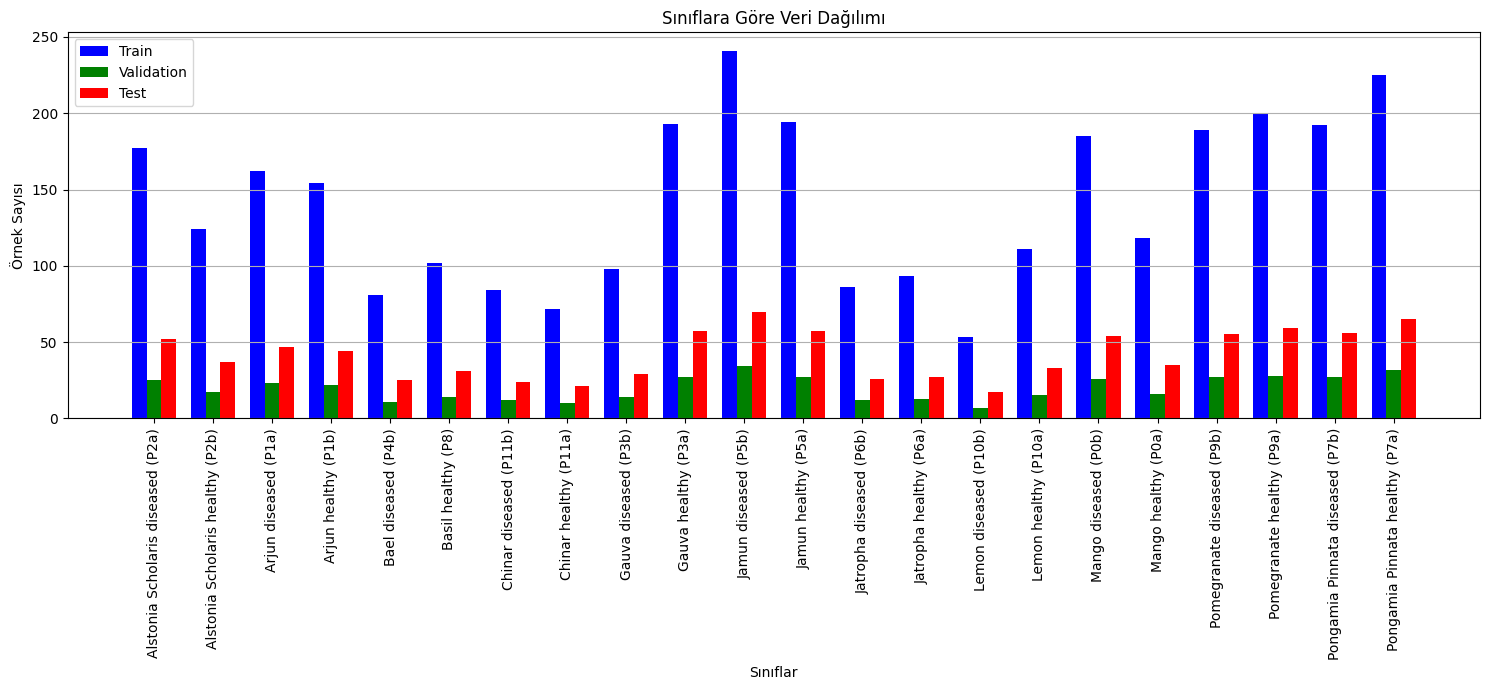

In [13]:
# Çubukların konumları
x = np.arange(len(df["Class"]))  # Sınıflar için indeksler
width = 0.25  # Çubukların genişliği

plt.figure(figsize=(15, 7))

# Eğitim seti için çubuklar
plt.bar(x - width, df["Train"], width=width, label="Train", color="blue")
# Doğrulama seti için çubuklar
plt.bar(x, df["Validation"], width=width, label="Validation", color="green")
# Test seti için çubuklar
plt.bar(x + width, df["Test"], width=width, label="Test", color="red")

# Eksen ayarları
plt.xticks(x, df["Class"], rotation=90)  # X eksenine sınıf isimlerini ekleme
plt.title("Sınıflara Göre Veri Dağılımı")
plt.ylabel("Örnek Sayısı")
plt.xlabel("Sınıflar")
plt.legend()
plt.grid(axis='y')  # yatay ızgara çizgileri
plt.tight_layout()  # Grafik elemanlarının düzgün görünmesi için
plt.show()


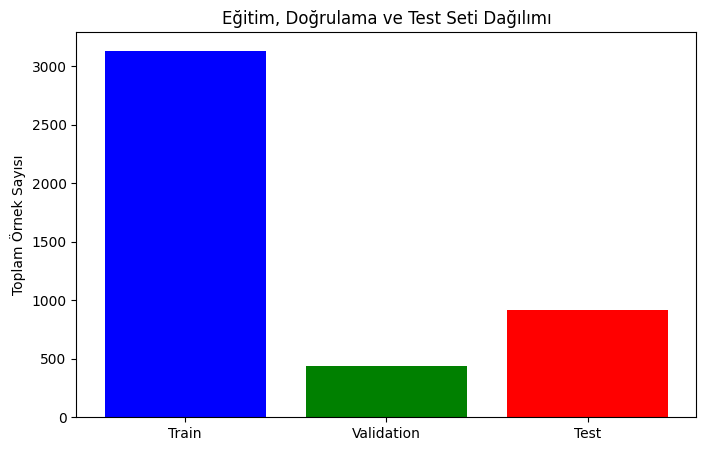

In [14]:
# Her veri seti için toplam örnek sayısı
plt.figure(figsize=(8, 5))
plt.bar(totals.keys(), totals.values(), color=['blue', 'green', 'red'])
plt.title("Eğitim, Doğrulama ve Test Seti Dağılımı")
plt.ylabel("Toplam Örnek Sayısı")
plt.show()

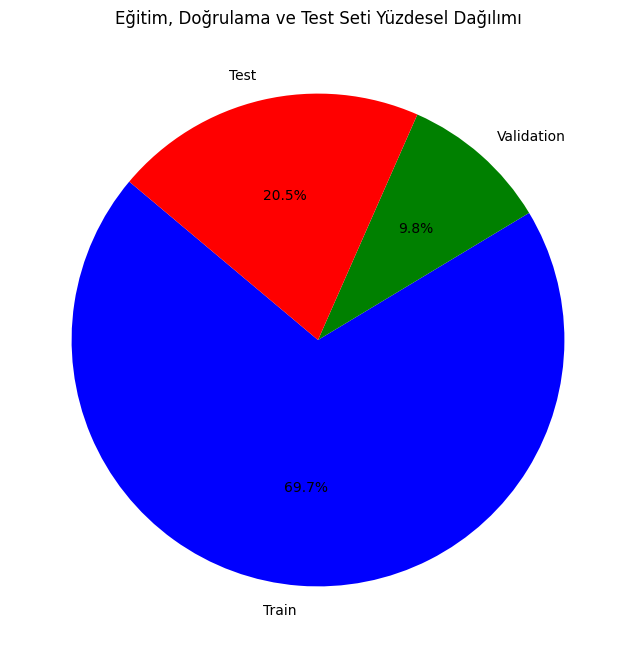

In [15]:
# # Veri seti yüzdesel dağılımı için pasta grafiği
plt.figure(figsize=(8, 8))
sizes = [sum(train_counts.values()), sum(val_counts.values()), sum(test_counts.values())]
labels = ["Train", "Validation", "Test"]
colors = ["blue", "green", "red"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("Eğitim, Doğrulama ve Test Seti Yüzdesel Dağılımı")
plt.show()

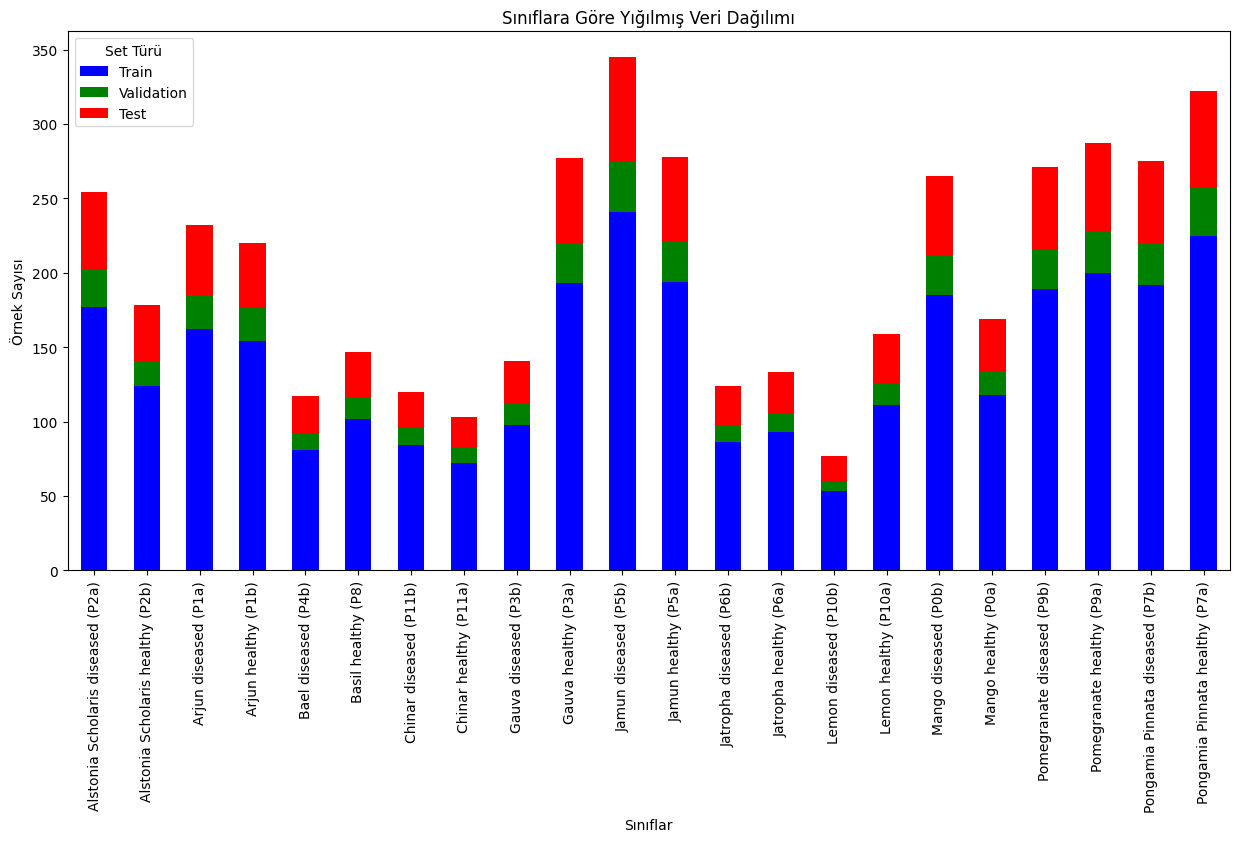

In [16]:
# Yığılmış bar grafiği
df.set_index("Class")[["Train", "Validation", "Test"]].plot(
    kind="bar", stacked=True, figsize=(15, 7), color=["blue", "green", "red"]
)
plt.title("Sınıflara Göre Yığılmış Veri Dağılımı")
plt.ylabel("Örnek Sayısı")
plt.xlabel("Sınıflar")
plt.xticks(rotation=90)
plt.legend(title="Set Türü")
plt.show()

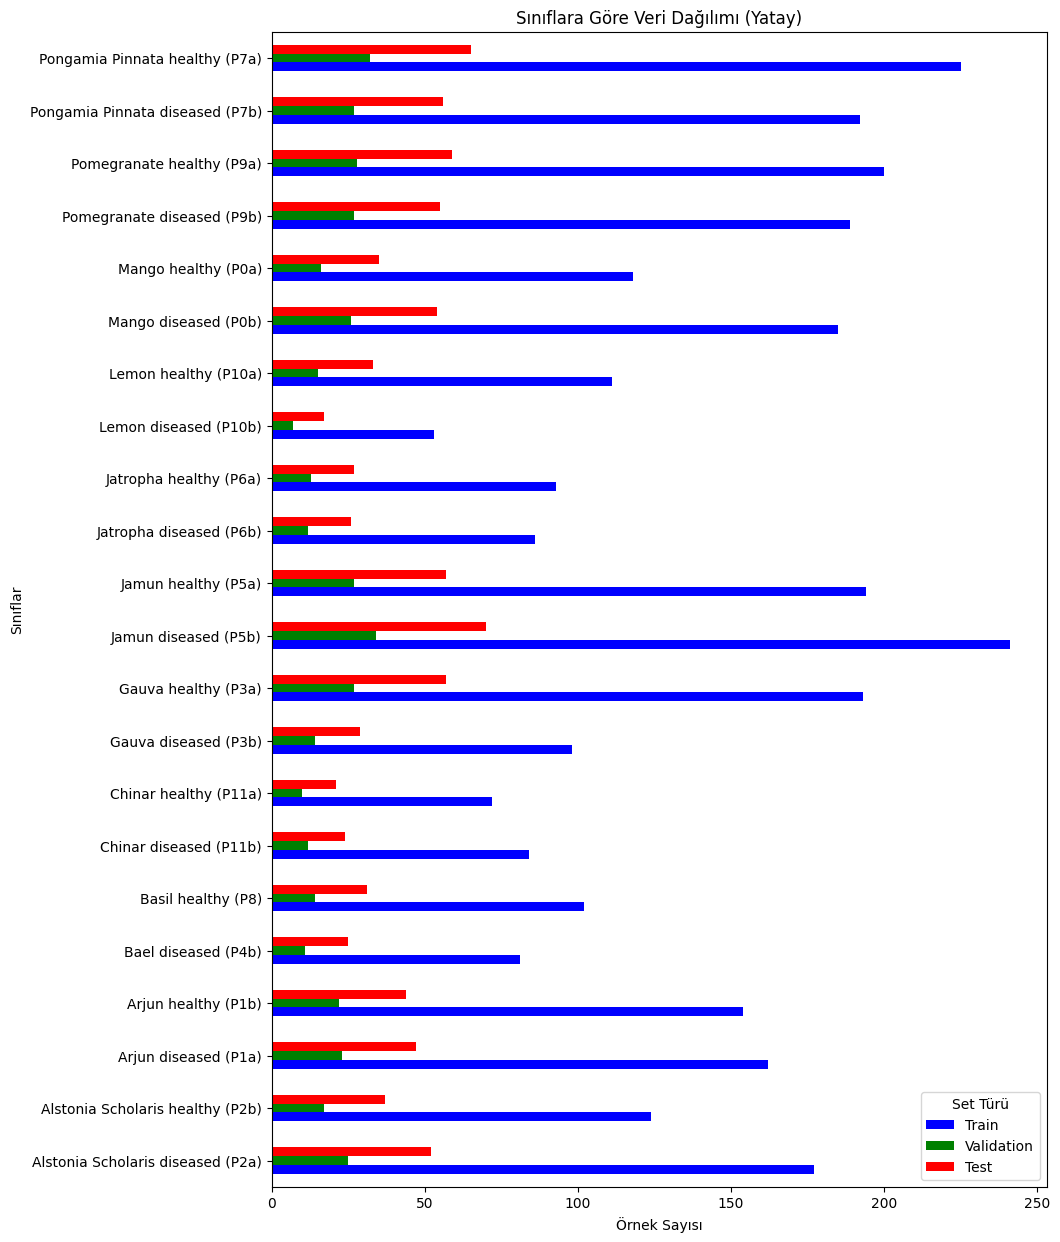

In [17]:
# Yatay bar grafiği
df.set_index("Class")[["Train", "Validation", "Test"]].plot(
    kind="barh", figsize=(10, 15), color=["blue", "green", "red"]
)
plt.title("Sınıflara Göre Veri Dağılımı (Yatay)")
plt.xlabel("Örnek Sayısı")
plt.ylabel("Sınıflar")
plt.legend(title="Set Türü")
plt.show()

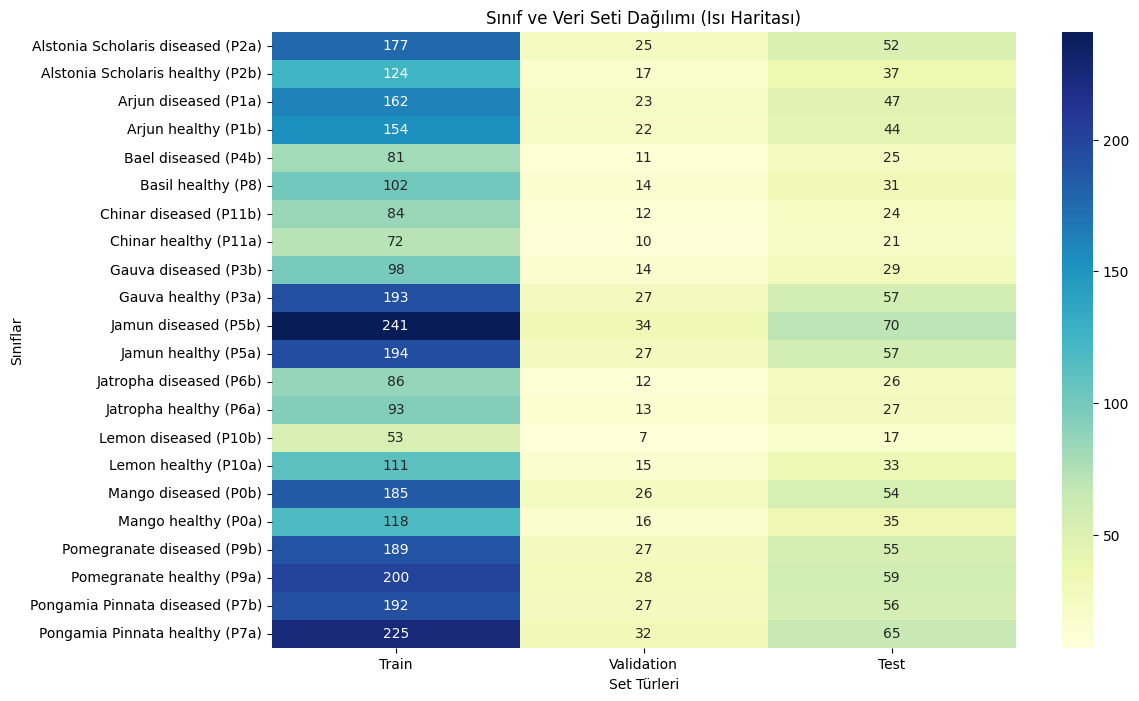

In [18]:
# Isı haritası için veriyi düzenle
heatmap_data = df.set_index("Class")[["Train", "Validation", "Test"]]

# Isı haritası
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Sınıf ve Veri Seti Dağılımı (Isı Haritası)")
plt.ylabel("Sınıflar")
plt.xlabel("Set Türleri")
plt.show()